In [93]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [94]:
def load_dataset(name):
    return np.loadtxt(name )

In [102]:
def euclidian(a, b):
    return np.linalg.norm(a-b)


In [109]:
def kmeans(k, epsilon=0, distance='euclidian'):
    #list to store past centroid
    history_centroids = []
    #set the distance calculation type 
    if distance == 'euclidian':
        dist_method = euclidian
    #set the dataset
    dataset = load_dataset('kmDat/durudataset.txt')
    # dataset = dataset[:, 0:dataset.shape[1] - 1]
    # get the number of rows (instances) and columns (features) from the dataset
    num_instances, num_features = dataset.shape
    #define k centroids (how many clusters do we want to find?) chosen randomly 
    prototypes = dataset[np.random.randint(0, num_instances - 1, size=k)]
    #set these to our list of past centroid (to show progress over time)
    history_centroids.append(prototypes)
    #to keep track of centroid at every iteration
    prototypes_old = np.zeros(prototypes.shape)
    #to store clusters
    belongs_to = np.zeros((num_instances, 1))
    norm = dist_method(prototypes, prototypes_old)
    iteration = 10
    while iteration < 100:
        iteration += 1
        norm = dist_method(prototypes, prototypes_old)
        #for each instance in the dataset
        for index_instance, instance in enumerate(dataset):
            #define a distance vector of size k
            dist_vec = np.zeros((k,1))
            #for each centroid
            for index_prototype, prototype in enumerate(prototypes):
                #compute the distance between x and centroid
                dist_vec[index_prototype] = dist_method(prototype, instance)
            #find the smallest distance, assign that distance to a cluster
            belongs_to[index_instance, 0] = np.argmin(dist_vec)
            
        tmp_prototypes = np.zeros((k, num_features))
        
        #for each cluster (k of them)
        for index in range(len(prototypes)):
            #get all the points assigned to a cluster
            instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
            #find the mean of those points, this is our new centroid
            prototype = np.mean(dataset[instances_close], axis=0)
            #add our new centroid to our new temporary list
            tmp_prototypes[index, :] = prototype
        
        #set the new list to the current list
        prototypes = tmp_prototypes
        
        #add our calculated centroids to our history for plotting
        history_centroids.append(tmp_prototypes)
        
    #return calculated centroids, history of them all, and assignments for which cluster each datapoint belongs to
    return prototypes, history_centroids, belongs_to

In [116]:
def plot(dataset, history_centroids, belongs_to):
    colors = ['r', 'g']
    
    fig, ax = plt.subplots()
    
    for index in range(dataset.shape[0]):
        instances_close = [i for i in range(len(belongs_to)) if belongs_to[i] == index]
        for instance_index in instances_close:
            print (colors[index] + 'o', index, colors[index])
            ax.plot(dataset[instance_index][0], dataset[instance_index][1], (colors[index] + 'o'))
    
           #lets also log the history of centroids calculated via training
    history_points = []
    #for each centroid ever calculated
    for index, centroids in enumerate(history_centroids):
        #print them all out
        for inner, item in enumerate(centroids):
            if index == 0:
                history_points.append(ax.plot(item[0], item[1], 'bo')[0])
            else:
                history_points[inner].set_data(item[0], item[1])
                print("centroids {} {}".format(index, item))

                plt.show()

<IPython.core.display.Javascript object>


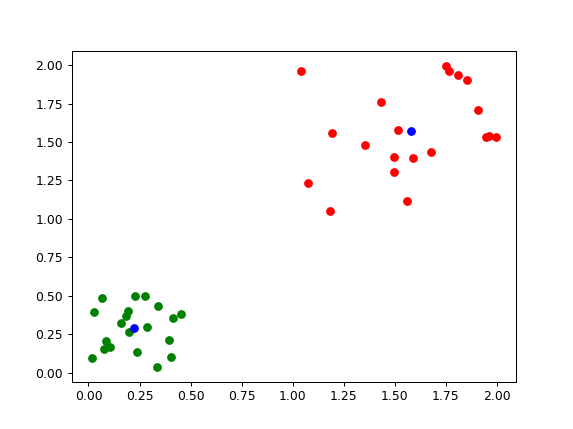

ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
ro 0 r
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
go 1 g
centroids 1 [ 1.58058247  1.56897412]
centroids 1 [ 0.22331067  0.28960446]
centroids 2 [ 1.58058247  1.56897412]
centroids 2 [ 0.22331067  0.28960446]
centroids 3 [ 1.58058247  1.56897412]
centroids 3 [ 0.22331067  0.28960446]
centroids 4 [ 1.58058247  1.56897412]
centroids 4 [ 0.22331067  0.28960446]
centroids 5 [ 1.58058247  1.56897412]
centroids 5 [ 0.22331067  0.28960446]
centroids 6 [ 1.58058247  1.56897412]
centroids 6 [ 0.22331067  0.28960446]
centroids 7 [ 1.58058247  1.56897412]
centroids 7 [ 0.22331067  0.28960446]
centroids 8 [ 1.58058247  1.56897412]
centroids 8 [ 0.22331067  0.28960446]
centroids 9 [ 1.58058247  1.56897412]
centroids 9 [ 0.22331067  0.28960446]
centroids 10 [ 1.58058247  1.5689741

In [117]:


#main file 
def execute():
    #load dataset
    dataset = load_dataset('kmDat/durudataset.txt')
    #train the model on the data
    centroids, history_centroids, belongs_to = kmeans(2)
    #plot the results
    plot(dataset, history_centroids, belongs_to)


execute()